# Problem Statement

Welcome to your first week of work at the Disease And Treatment Agency, division of Societal Cures In Epidemiology and New Creative Engineering (DATA-SCIENCE). Time to get to work!

Due to the recent epidemic of West Nile Virus in the Windy City, we've had the Department of Public Health set up a surveillance and control system. We're hoping it will let us learn something from the mosquito population as we collect data over time. Pesticides are a necessary evil in the fight for public health and safety, not to mention expensive! We need to derive an effective plan to deploy pesticides throughout the city, and that is exactly where you come in!

# Imports and Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 0)

%matplotlib inline

In [2]:
train = pd.read_csv('./assets/train.csv')
test = pd.read_csv('./assets/test.csv')
weather = pd.read_csv('./assets/weather.csv')
spray = pd.read_csv('./assets/spray.csv')

In [3]:
def create_lag_time(phenom):
    '''Creates a dataframe of a chosen column and time lags it 14 days vs the presence of West Nile Virus, and then
    plots the number of cases against each day.'''
    temp_df = pd.DataFrame()                           # temp dataframe to hold the lagged days
    temp_df['wnvpresent'] = train_comb['wnvpresent']
    temp_df[phenom] = train_comb[phenom]

    for n in range (1,15):                             # lag variable 14 times
        phenom_name = phenom + str(n)
        temp_df[phenom_name] = temp_df[phenom].shift(n)

    temp_df.dropna(inplace = True)                      # drop na rows from lag
    temp_df.reset_index(drop = 'first', inplace = True)
    
    return temp_df

In [4]:
def plot_graphs(list_of_variables, suptitle, fig_size):
    fig, axs = plt.subplots((len(list_of_variables)//2) + 1, 2, figsize = fig_size)
    fig.suptitle(suptitle, fontsize = 18)
    fig.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 3.0, rect = [0, 0, 1, 0.95]) 
    axs = axs.ravel()
    plot_count = 0
    for variable in list_of_variables:
        temp_df = create_lag_time(variable)
        axs[plot_count].bar(
            x = temp_df.drop(columns = 'wnvpresent').columns,
            height = temp_df[temp_df['wnvpresent'] == 1].drop(columns = 'wnvpresent').sum()
        )
        axs[plot_count].set_title(f'({variable}) vs Different Lag Times', 
                  fontsize = 8)
        axs[plot_count].set_ylabel('Number of West Nile Virus Cases', fontsize = 8)
        axs[plot_count].set_xlabel(f'{variable} Lag Times', fontsize = 8)
        plot_count += 1;

In [5]:
def clean_data(row):
    if ('M' in row) | ('T' in row):
        row = np.nan  # to impute
    return row

In [6]:
def adjust_columns(df):
    df.columns = df.columns.str.lower()
    
    df['date'] = pd.to_datetime(df['date'])
    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    return df

# Data Cleaning

In [7]:
train = adjust_columns(train)
test = adjust_columns(test)
weather = adjust_columns(weather)
spray = adjust_columns(spray)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    10506 non-null  datetime64[ns]
 1   address                 10506 non-null  object        
 2   species                 10506 non-null  object        
 3   block                   10506 non-null  int64         
 4   street                  10506 non-null  object        
 5   trap                    10506 non-null  object        
 6   addressnumberandstreet  10506 non-null  object        
 7   latitude                10506 non-null  float64       
 8   longitude               10506 non-null  float64       
 9   addressaccuracy         10506 non-null  int64         
 10  nummosquitos            10506 non-null  int64         
 11  wnvpresent              10506 non-null  int64         
 12  day                     10506 non-null  int64 

In [9]:
train.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,day,month,year
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,29,5,2007
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,29,5,2007
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,29,5,2007


In [10]:
train.isnull().sum()

date                      0
address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
nummosquitos              0
wnvpresent                0
day                       0
month                     0
year                      0
dtype: int64

In [11]:
test.isnull().sum()

id                        0
date                      0
address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
day                       0
month                     0
year                      0
dtype: int64

In [12]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   int64         
 3   tmin         2944 non-null   int64         
 4   tavg         2944 non-null   object        
 5   depart       2944 non-null   object        
 6   dewpoint     2944 non-null   int64         
 7   wetbulb      2944 non-null   object        
 8   heat         2944 non-null   object        
 9   cool         2944 non-null   object        
 10  sunrise      2944 non-null   object        
 11  sunset       2944 non-null   object        
 12  codesum      2944 non-null   object        
 13  depth        2944 non-null   object        
 14  water1       2944 non-null   object        
 15  snowfall     2944 non-null   object        
 16  precip

In [13]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       14835 non-null  datetime64[ns]
 1   time       14251 non-null  object        
 2   latitude   14835 non-null  float64       
 3   longitude  14835 non-null  float64       
 4   day        14835 non-null  int64         
 5   month      14835 non-null  int64         
 6   year       14835 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 811.4+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      116293 non-null  int64         
 1   date                    116293 non-null  datetime64[ns]
 2   address                 116293 non-null  object        
 3   species                 116293 non-null  object        
 4   block                   116293 non-null  int64         
 5   street                  116293 non-null  object        
 6   trap                    116293 non-null  object        
 7   addressnumberandstreet  116293 non-null  object        
 8   latitude                116293 non-null  float64       
 9   longitude               116293 non-null  float64       
 10  addressaccuracy         116293 non-null  int64         
 11  day                     116293 non-null  int64         
 12  month                   116293

In [15]:
train['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [16]:
train['trap'].unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

In [17]:
train_longs = train['longitude']
train_lats = train['latitude']

spray_longs = spray['longitude']
spray_lats = spray['latitude']

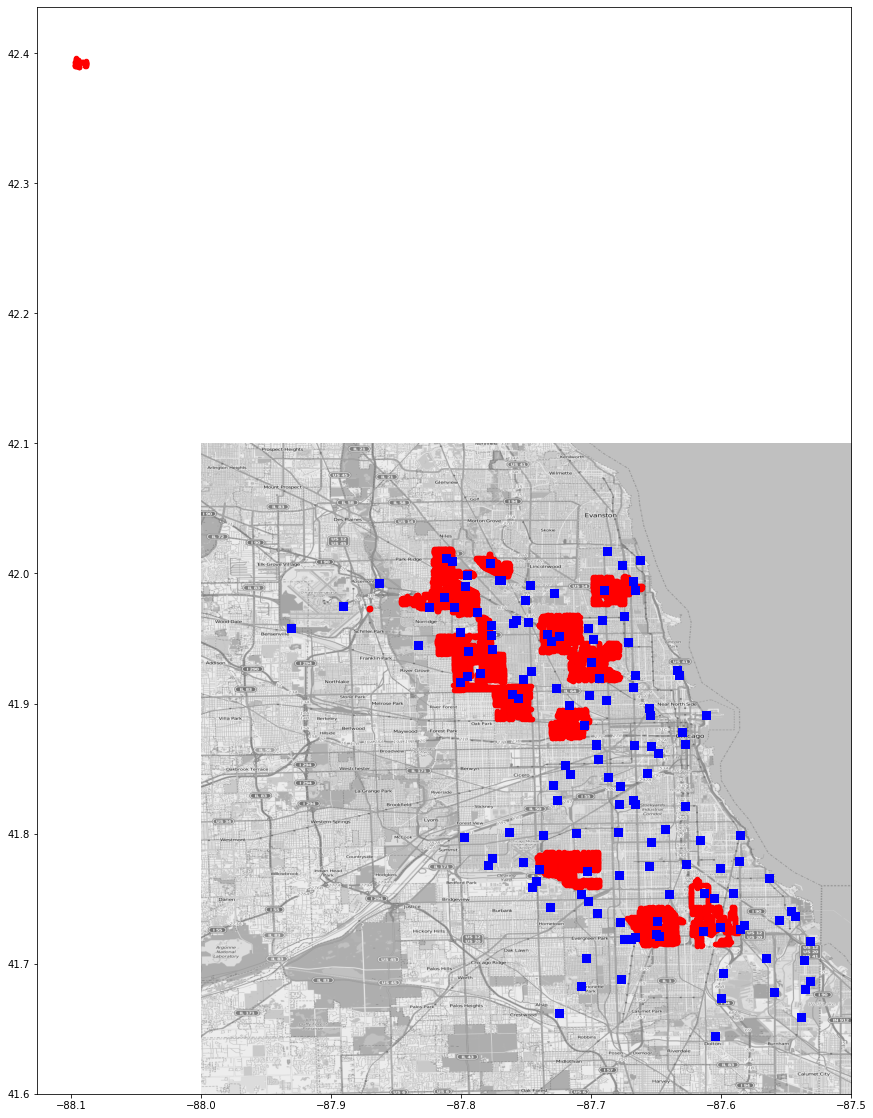

In [18]:
plt.figure(figsize=(15,20))
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")

intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth


# generate plot
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.scatter(x=spray_longs, y=spray_lats, c='r', s=20)
plt.scatter(x=train_longs, y=train_lats, c='b', s=60, marker='s')

#plt.show()
#plt.savefig('map.png')

## Data Cleaning for Train

In [19]:
train['month'].value_counts(normalize=True)

8     0.357034
7     0.248049
9     0.211117
6     0.149534
10    0.026271
5     0.007995
Name: month, dtype: float64

In [20]:
train['addressaccuracy'].value_counts(normalize=True)

8    0.440510
9    0.378831
5    0.171997
3    0.008662
Name: addressaccuracy, dtype: float64

In [21]:
train[train['nummosquitos'] == 50].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 293 to 10267
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    1019 non-null   datetime64[ns]
 1   address                 1019 non-null   object        
 2   species                 1019 non-null   object        
 3   block                   1019 non-null   int64         
 4   street                  1019 non-null   object        
 5   trap                    1019 non-null   object        
 6   addressnumberandstreet  1019 non-null   object        
 7   latitude                1019 non-null   float64       
 8   longitude               1019 non-null   float64       
 9   addressaccuracy         1019 non-null   int64         
 10  nummosquitos            1019 non-null   int64         
 11  wnvpresent              1019 non-null   int64         
 12  day                     1019 non-null   int64

In [22]:
train[train['addressaccuracy'] == 3]

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,day,month,year
69,2007-06-05,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,3,0,5,6,2007
127,2007-06-26,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,26,6,2007
179,2007-06-29,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,29,6,2007
237,2007-07-02,"Chicago, IL, USA",CULEX SALINARIUS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,2,7,2007
342,2007-07-11,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,3,0,11,7,2007
343,2007-07-11,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,11,7,2007
557,2007-07-19,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,19,7,2007
728,2007-07-27,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,4,0,27,7,2007
729,2007-07-27,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,2,0,27,7,2007
929,2007-08-01,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,6,0,1,8,2007


In [23]:
train.duplicated().sum()

813

In [24]:
train.loc[train['nummosquitos'] != 50, :].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9487 entries, 0 to 10505
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    9487 non-null   datetime64[ns]
 1   address                 9487 non-null   object        
 2   species                 9487 non-null   object        
 3   block                   9487 non-null   int64         
 4   street                  9487 non-null   object        
 5   trap                    9487 non-null   object        
 6   addressnumberandstreet  9487 non-null   object        
 7   latitude                9487 non-null   float64       
 8   longitude               9487 non-null   float64       
 9   addressaccuracy         9487 non-null   int64         
 10  nummosquitos            9487 non-null   int64         
 11  wnvpresent              9487 non-null   int64         
 12  day                     9487 non-null   int64  

In [25]:
train_clean = train.drop_duplicates(subset = ['date', 'species', 'latitude', 'longitude', 'address', 'trap', 'wnvpresent'], keep = 'first')
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8610 entries, 0 to 10505
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    8610 non-null   datetime64[ns]
 1   address                 8610 non-null   object        
 2   species                 8610 non-null   object        
 3   block                   8610 non-null   int64         
 4   street                  8610 non-null   object        
 5   trap                    8610 non-null   object        
 6   addressnumberandstreet  8610 non-null   object        
 7   latitude                8610 non-null   float64       
 8   longitude               8610 non-null   float64       
 9   addressaccuracy         8610 non-null   int64         
 10  nummosquitos            8610 non-null   int64         
 11  wnvpresent              8610 non-null   int64         
 12  day                     8610 non-null   int64  

Mosquito count capped at 50, additional mosquitos caught above that are made into a new record.

These records and duplicate records have been deleted.

In [26]:
train_clean.reset_index(drop = True, inplace = True)

In [27]:
train_clean.drop(columns = ['address', 'block', 'street', 'addressnumberandstreet'], inplace = True)

C:\Users\Ming\anaconda3\envs\dsi24\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Since we already have latitude and longitude, we will drop the other address-related columns:
* nummosquitos
* address
* block
* street
* addressnumberandstreet

## Data Cleaning for Spray

In [28]:
spray['month'].value_counts(normalize=True)

8    0.538456
7    0.256758
9    0.204786
Name: month, dtype: float64

In [29]:
spray['longitude'].describe()

count    14835.000000
mean       -87.736690
std          0.067292
min        -88.096468
25%        -87.794225
50%        -87.727853
75%        -87.694108
max        -87.586727
Name: longitude, dtype: float64

In [30]:
train['longitude'].describe()

count    10506.000000
mean       -87.699908
std          0.096514
min        -87.930995
25%        -87.760070
50%        -87.694991
75%        -87.627796
max        -87.531635
Name: longitude, dtype: float64

<AxesSubplot:xlabel='longitude'>

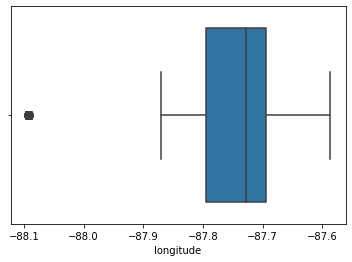

In [31]:
sns.boxplot(data=spray, x='longitude')

In [32]:
spray = spray[spray['longitude'] > -88]

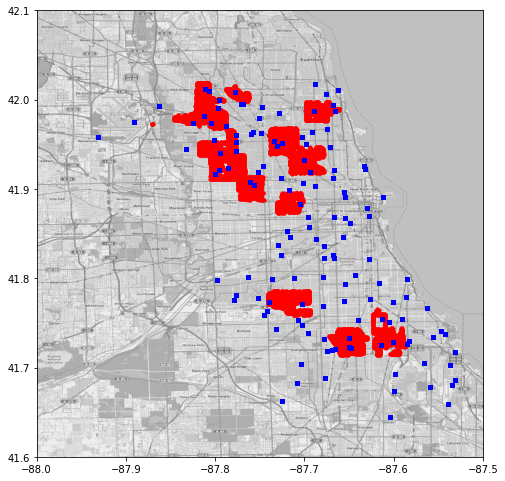

In [33]:
train_longs = train['longitude']
train_lats = train['latitude']

spray_longs = spray['longitude']
spray_lats = spray['latitude']

plt.figure(figsize=(8,10))
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")

intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth


# generate plot
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.scatter(x=spray_longs, y=spray_lats, c='r', s=10)
plt.scatter(x=train_longs, y=train_lats, c='b', s=15, marker='s')

# plt.savefig('map.png')

In [34]:
spray.duplicated().sum()

541

In [35]:
spray_clean = spray.drop_duplicates(keep = 'first')

In [36]:
spray_clean['spray'] = 1

<ipython-input-36-d11d5e90271a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spray_clean['spray'] = 1


In [37]:
spray_clean = spray_clean.drop(columns = 'time')

We dropped the time column because time of day was not a concern. As long as the spray occurred 8-10 days prior, it would disrupt the mosquito lifecycle.

Considerations that might change it would be if we knew when precipitation ended. However, as this is not recorded on the weather forecast, we will assume that sprays occurred post-rainfall.

## Data Cleaning for Weather

In [38]:
weather['month'].value_counts(normalize=True)

8     0.168478
10    0.168478
5     0.168478
7     0.168478
6     0.163043
9     0.163043
Name: month, dtype: float64

In [39]:
weather['water1'].value_counts()

M    2944
Name: water1, dtype: int64

In [40]:
weather = weather.drop(columns = 'water1')

In [41]:
# check for missing or trace values based on data dict
weather.isin(['T', 'M']).sum()

station           0
date              0
tmax              0
tmin              0
tavg             11
depart         1472
dewpoint          0
wetbulb           4
heat             11
cool             11
sunrise           0
sunset            0
codesum           0
depth          1472
snowfall       1472
preciptotal       2
stnpressure       4
sealevel          9
resultspeed       0
resultdir         0
avgspeed          3
day               0
month             0
year              0
dtype: int64

### Imputing

####  Depth and Snowfall

In [42]:
weather['depth'].value_counts()

0    1472
M    1472
Name: depth, dtype: int64

In [43]:
weather['snowfall'].value_counts()

M      1472
0.0    1459
  T      12
0.1       1
Name: snowfall, dtype: int64

We will drop both depth and snowfall since most values are missing, 0 or trace.

In [44]:
weather.drop(columns = ['depth', 'snowfall'], inplace = True)

In [45]:
weather[['station','date','sunrise', 'sunset']]

,station,date,sunrise,sunset
0,1,2007-05-01,0448,1849
1,2,2007-05-01,-,-
2,1,2007-05-02,0447,1850
3,2,2007-05-02,-,-
4,1,2007-05-03,0446,1851
...,...,...,...,...
2939,2,2014-10-29,-,-
2940,1,2014-10-30,0622,1649
2941,2,2014-10-30,-,-
2942,1,2014-10-31,0623,1647


#### Sunrise and Sunset

In [46]:
# impute sunrise data with the data in the row above
for n in weather.index:
    if n % 2 == 1:
        weather['sunrise'][n] = weather['sunrise'][n-1]

<ipython-input-46-b0dc24ae8234>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['sunrise'][n] = weather['sunrise'][n-1]


In [47]:
# impute sunset data with the data in the row above
for n in weather.index:
    if n % 2 == 1:
        weather['sunset'][n] = weather['sunset'][n-1]

<ipython-input-47-d40f2b359dc5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['sunset'][n] = weather['sunset'][n-1]


In [48]:
# convert sunrise and sunset columns to numbers
weather['sunrise'] = weather['sunrise'].astype(int)
weather['sunset'] = weather['sunset'].astype(int)

In [49]:
# to convert sunrise and sunset into number of mins from start of day
# subsequently we can feature engineer with total sunlight time (sunset - sunrise)
def get_duration(sun_time):
    hours = sun_time // 100  # hour value
    mins = sun_time % 100   # min value
    total_mins = hours * 60 + mins
    return total_mins

In [50]:
weather['sunrise_dur'] = weather['sunrise'].apply(get_duration)
weather['sunset_dur'] = weather['sunset'].apply(get_duration)

#### Average Temperature

In [51]:
def impute_tavg(row):
    if row['tavg'] == 'M':
        row['tavg'] = round((row['tmax'] + row['tmin']) / 2) 
    return row

In [52]:
weather = weather.apply(impute_tavg, axis=1)

In [53]:
weather['tavg'] = weather['tavg'].astype(int)

#### Heat and Cool

In [54]:
for row in weather.index:
    avg_temp = weather['tavg'][row] - 65
    if avg_temp >= 0:
        weather['cool'][row] = avg_temp
        weather['heat'][row] = 0
    if avg_temp < 0:
        weather['heat'][row] = abs(avg_temp)
        weather['cool'][row] = 0        

<ipython-input-54-2eeee7d08e47>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['cool'][row] = avg_temp
<ipython-input-54-2eeee7d08e47>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['heat'][row] = 0
<ipython-input-54-2eeee7d08e47>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['heat'][row] = abs(avg_temp)
<ipython-input-54-2eeee7d08e47>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

#### Departure from Norm

In [55]:
weather.loc[weather['depart'].str.contains('M')].head(20)

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,day,month,year,sunrise_dur,sunset_dur
1,2,2007-05-01,84,52,68,M,51,57,0,3,448,1849,,0.00,29.18,29.82,2.7,25,9.6,1,5,2007,288,1129
3,2,2007-05-02,60,43,52,M,42,47,13,0,447,1850,BR HZ,0.00,29.44,30.08,13.3,2,13.4,2,5,2007,287,1130
5,2,2007-05-03,67,48,58,M,40,50,7,0,446,1851,HZ,0.00,29.46,30.12,12.9,6,13.2,3,5,2007,286,1131
7,2,2007-05-04,78,51,64,M,42,50,1,0,444,1852,,0.00,29.36,30.04,10.1,7,10.4,4,5,2007,284,1132
9,2,2007-05-05,66,54,60,M,39,50,5,0,443,1853,,T,29.46,30.09,11.2,7,11.5,5,5,2007,283,1133
11,2,2007-05-06,68,52,60,M,30,46,5,0,442,1855,,0.00,29.62,30.28,13.8,10,14.5,6,5,2007,282,1135
13,2,2007-05-07,84,50,67,M,39,53,0,2,441,1856,,0.00,29.44,30.12,8.5,17,9.9,7,5,2007,281,1136
15,2,2007-05-08,80,60,70,M,57,63,0,5,439,1857,HZ,T,29.36,30.02,2.5,8,5.4,8,5,2007,279,1137
17,2,2007-05-09,76,63,70,M,60,63,0,5,438,1858,BR HZ,0.02,29.28,29.93,3.9,7,5.9,9,5,2007,278,1138
19,2,2007-05-10,83,59,71,M,52,61,0,6,437,1859,BR HZ,0.00,29.26,29.91,2.0,9,3.9,10,5,2007,277,1139


In [56]:
weather.loc[(weather['depart'].str.contains('M')) &
            (weather['station'] == 1)]

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,day,month,year,sunrise_dur,sunset_dur


We see that all the missing values in the Depart column are found in Station 2 only.

Based on the data dictionary, Depart means the departure from normal temperature.

In order to impute the missing values here, we suggest to:
1. Take the 'Tavg' difference between both stations for each day 
2. Add this difference to the Station 1's 'Depart' value to calculate Station 2's 'Depart' value

In [57]:
weather.loc[[1], 'depart']

1    M
Name: depart, dtype: object

In [58]:
def impute_depart(row):
    if row['station'] == 2:
        diff = row['tavg'] - int(weather.loc[(weather['date'] == row['date']) &
                                         (weather['station'] == 1),
                                         'tavg'])
        
        row['depart'] = diff + int(weather.loc[(weather['date'] == row['date']) &
                                           (weather['station'] == 1), 
                                           'depart'])
        
    return row

In [59]:
weather = weather.apply(impute_depart, axis=1)

#### Wetbulb

In [60]:
def check_value(df, col, station_1_idx):
    if ((df.loc[station_1_idx][col] in ['M','T']) & (df.loc[station_1_idx+1][col] in ['M','T'])):
        return True
    else:
        return False

In [61]:
def impute_data(df, col):
    df_1 = df.loc[(df['station'] == 1) & (~df[col].str.strip().isin(['M','T'])),col].astype(float)
    df_2 = df.loc[(df['station'] == 2) & (~df[col].str.strip().isin(['M','T'])),col].astype(float)
    mean_diff = df_1.mean() - df_2.mean()
    
    idx = list(df.loc[(df[col].str.strip().isin(['M']))].index)
    
    for i in idx:
        if df.loc[i]['station'] == 1:
            if check_value(df, col, i):
                new_val = (float(df.loc[i+2][col]) + float(df.loc[i-2][col])) / 2
                df.at[i,col] = new_val
                df.at[i+1,col] = new_val
                idx.remove(i)
                idx.remove(i+1)
            else:
                df.at[i,col] = float(df.loc[i+1][col]) + mean_diff
        else:
            df.at[i,col] = float(df.loc[i-1][col]) + mean_diff
    
    zero_idx = list(df.loc[(df[col].str.strip().isin(['T']))].index)
    for i in zero_idx:
        df.at[i,col] = 0
    
    return df

In [62]:
weather = impute_data(weather, 'wetbulb')

#### Total Precipitation

In [63]:
weather = impute_data(weather, 'preciptotal')

#### Station Pressure

In [64]:
weather = impute_data(weather, 'stnpressure')

#### Average Speed

In [65]:
weather = impute_data(weather, 'avgspeed')

#### Sea Level

In [66]:
weather = impute_data(weather,'sealevel')

## Vectorizing Weather Phenomena

In [67]:
weather['codesum'].unique()

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer()
we_types = cvec.fit_transform(weather['codesum'])

In [69]:
we_types = pd.DataFrame(
    we_types.todense(),
    columns = cvec.get_feature_names()
            )

In [70]:
for row in range(len(we_types)):
    if we_types['tsra'][row] == 1:
        we_types['ts'][row] = 1
        we_types['ra'][row] = 1

we_types.drop(columns = 'tsra', inplace = True)

In [71]:
we_types.sum().sort_values(ascending = False)

ra      1035
br       813
ts       345
hz       263
dz       133
fg        43
vcts      19
fu         9
sn         6
bcfg       5
vcfg       4
mifg       3
sq         3
gr         1
dtype: int64

In [72]:
we_types

,bcfg,br,dz,fg,fu,gr,hz,mifg,ra,sn,sq,ts,vcfg,vcts
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2940,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2941,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2942,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [73]:
weather.drop(columns = 'codesum', inplace = True)

In [74]:
weather_clean = pd.concat(
    objs = [weather, we_types],
    axis = 1
)

## Numericizing Columns

In [75]:
weather_clean.isin(['M','T']).sum()

station        0
date           0
tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        0
heat           0
cool           0
sunrise        0
sunset         0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
day            0
month          0
year           0
sunrise_dur    0
sunset_dur     0
bcfg           0
br             0
dz             0
fg             0
fu             0
gr             0
hz             0
mifg           0
ra             0
sn             0
sq             0
ts             0
vcfg           0
vcts           0
dtype: int64

In [76]:
num_list = ['depart', 'wetbulb', 'preciptotal', 'stnpressure', 'sealevel', 'avgspeed']
for col in num_list:
    weather_clean[col].astype(float)

In [77]:
# check for missing or trace values based on data dict
weather.isin(['T', 'M']).sum()

station        0
date           0
tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        0
heat           0
cool           0
sunrise        0
sunset         0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
day            0
month          0
year           0
sunrise_dur    0
sunset_dur     0
dtype: int64

In [78]:
train_comb = train_clean.merge(
    weather_clean, 
    how='left', 
    on = ['date', 'day', 'month', 'year'])

In [79]:
spray_comb = pd.concat(objs = [train_comb, spray_clean])

In [80]:
spray_comb['spray'].fillna(0, inplace = True)

In [81]:
train_comb = train_comb.set_index('date').sort_index()
spray_comb = spray_comb.set_index('date').sort_index()

# Exploratory Data Analysis

In [82]:
spray_comb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31419 entries, 2007-05-29 to 2013-09-26
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   species          17220 non-null  object 
 1   trap             17220 non-null  object 
 2   latitude         31419 non-null  float64
 3   longitude        31419 non-null  float64
 4   addressaccuracy  17220 non-null  float64
 5   nummosquitos     17220 non-null  float64
 6   wnvpresent       17220 non-null  float64
 7   day              31419 non-null  int64  
 8   month            31419 non-null  int64  
 9   year             31419 non-null  int64  
 10  station          17220 non-null  float64
 11  tmax             17220 non-null  float64
 12  tmin             17220 non-null  float64
 13  tavg             17220 non-null  float64
 14  depart           17220 non-null  object 
 15  dewpoint         17220 non-null  float64
 16  wetbulb          17220 non-null  object 


In [83]:
spray_clean['date'].unique()

array(['2011-09-07T00:00:00.000000000', '2013-07-17T00:00:00.000000000',
       '2013-07-25T00:00:00.000000000', '2013-08-08T00:00:00.000000000',
       '2013-08-15T00:00:00.000000000', '2013-08-16T00:00:00.000000000',
       '2013-08-22T00:00:00.000000000', '2013-08-29T00:00:00.000000000',
       '2013-09-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [84]:
train_clean.loc[train_clean['year'] == 2011, 'date'].unique()

array(['2011-06-10T00:00:00.000000000', '2011-06-17T00:00:00.000000000',
       '2011-06-24T00:00:00.000000000', '2011-06-30T00:00:00.000000000',
       '2011-07-11T00:00:00.000000000', '2011-07-15T00:00:00.000000000',
       '2011-07-25T00:00:00.000000000', '2011-07-29T00:00:00.000000000',
       '2011-08-05T00:00:00.000000000', '2011-08-12T00:00:00.000000000',
       '2011-08-19T00:00:00.000000000', '2011-08-26T00:00:00.000000000',
       '2011-09-01T00:00:00.000000000', '2011-09-02T00:00:00.000000000',
       '2011-09-12T00:00:00.000000000', '2011-09-16T00:00:00.000000000',
       '2011-09-23T00:00:00.000000000', '2011-09-30T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [85]:
train_clean.loc[(train_clean['year'] == 2013),'date'].unique()

array(['2013-06-07T00:00:00.000000000', '2013-06-14T00:00:00.000000000',
       '2013-06-21T00:00:00.000000000', '2013-06-27T00:00:00.000000000',
       '2013-06-28T00:00:00.000000000', '2013-07-08T00:00:00.000000000',
       '2013-07-12T00:00:00.000000000', '2013-07-19T00:00:00.000000000',
       '2013-07-25T00:00:00.000000000', '2013-08-01T00:00:00.000000000',
       '2013-08-08T00:00:00.000000000', '2013-08-15T00:00:00.000000000',
       '2013-08-22T00:00:00.000000000', '2013-08-29T00:00:00.000000000',
       '2013-09-06T00:00:00.000000000', '2013-09-12T00:00:00.000000000',
       '2013-09-19T00:00:00.000000000', '2013-09-26T00:00:00.000000000'],
      dtype='datetime64[ns]')

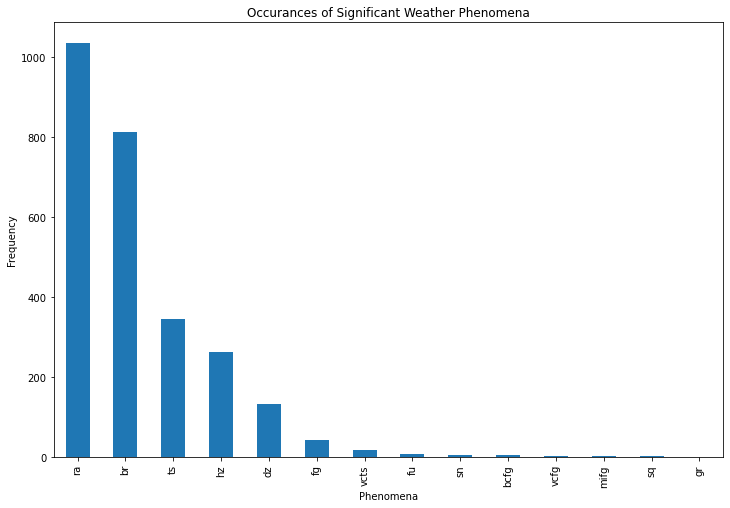

In [86]:
plt.figure(figsize = (12,8))
plt.title('Occurances of Significant Weather Phenomena')
plt.xlabel('Phenomena')
plt.ylabel('Frequency')
we_types.sum().sort_values(ascending = False).plot.bar();

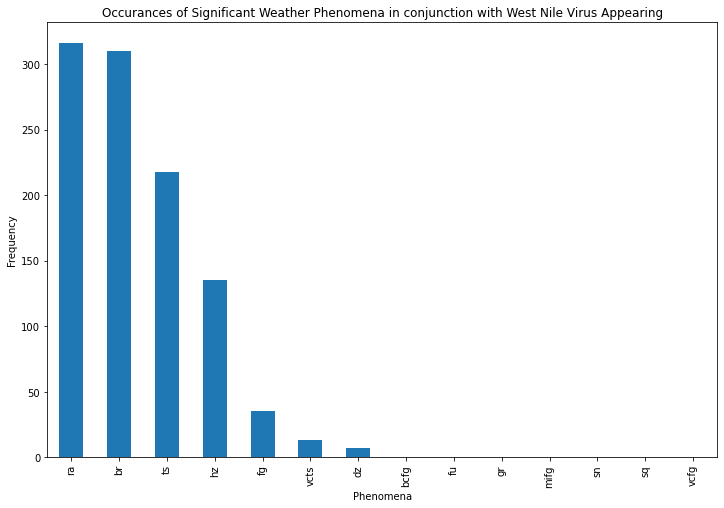

In [87]:
weather_phenom = [x for x in we_types.columns]
train_comb.loc[train_comb['wnvpresent'] == 1, weather_phenom]

plt.figure(figsize = (12,8))
plt.title('Occurances of Significant Weather Phenomena in conjunction with West Nile Virus Appearing')
plt.xlabel('Phenomena')
plt.ylabel('Frequency')
train_comb.loc[train_comb['wnvpresent'] == 1, weather_phenom].sum().sort_values(ascending = False).plot.bar();

In [88]:
train_comb.loc[train_comb['wnvpresent'] == 1, weather_phenom].sum().sort_values(ascending = False)

ra      316
br      310
ts      218
hz      135
fg       35
vcts     13
dz        7
bcfg      0
fu        0
gr        0
mifg      0
sn        0
sq        0
vcfg      0
dtype: int64

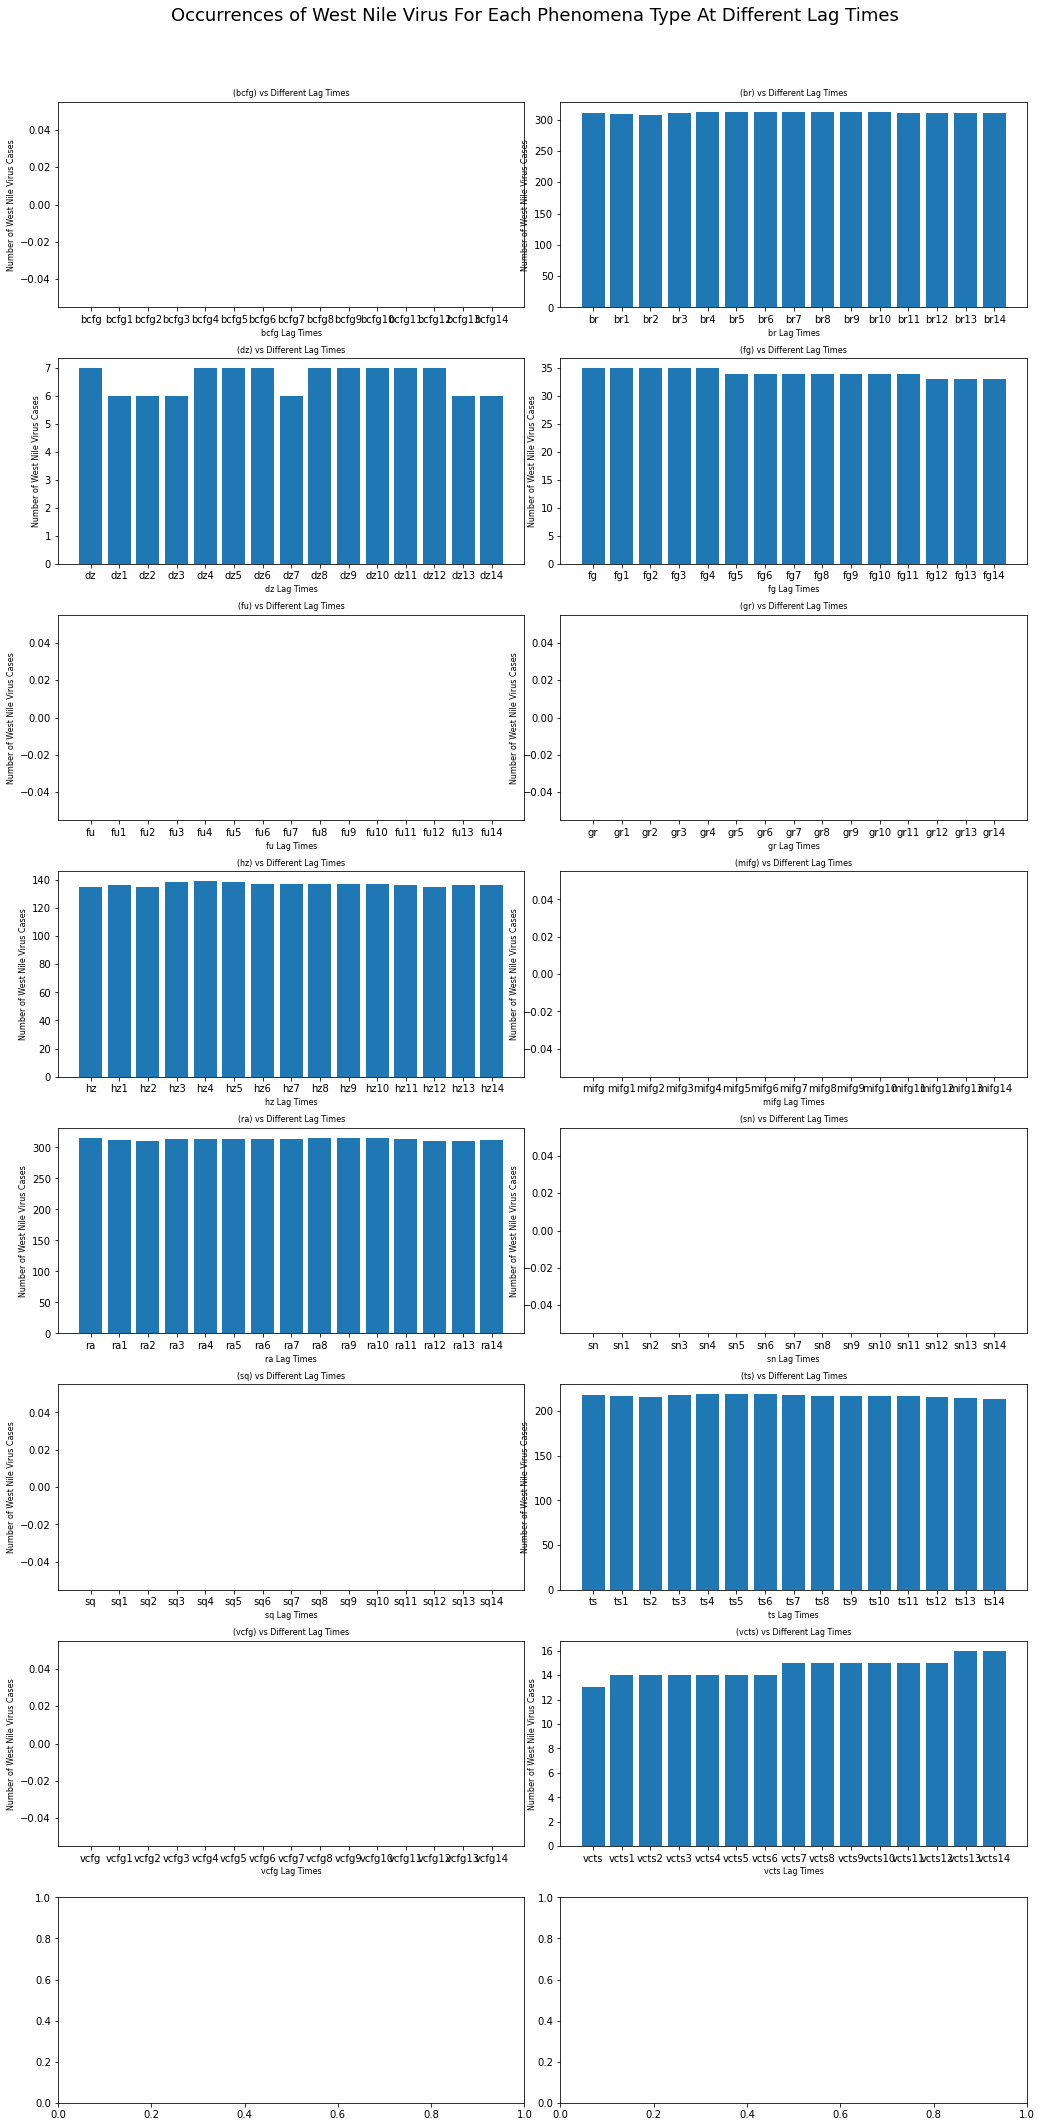

In [89]:
plot_title = 'Occurrences of West Nile Virus For Each Phenomena Type At Different Lag Times'
fig_size = (14, 30)
plot_graphs(weather_phenom, plot_title, fig_size)

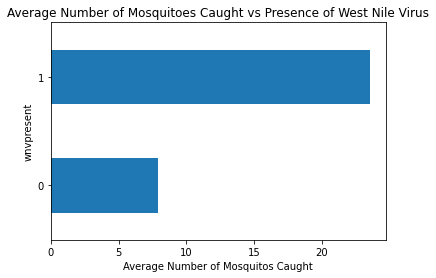

In [90]:
plt.title('Average Number of Mosquitoes Caught vs Presence of West Nile Virus')
plt.xlabel('Average Number of Mosquitos Caught')
train_comb.groupby('wnvpresent')['nummosquitos'].mean().plot.barh();

In [91]:
spray_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14199 entries, 95 to 14834
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       14199 non-null  datetime64[ns]
 1   latitude   14199 non-null  float64       
 2   longitude  14199 non-null  float64       
 3   day        14199 non-null  int64         
 4   month      14199 non-null  int64         
 5   year       14199 non-null  int64         
 6   spray      14199 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 887.4 KB


In [92]:
train_comb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17220 entries, 2007-05-29 to 2013-09-26
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   species          17220 non-null  object 
 1   trap             17220 non-null  object 
 2   latitude         17220 non-null  float64
 3   longitude        17220 non-null  float64
 4   addressaccuracy  17220 non-null  int64  
 5   nummosquitos     17220 non-null  int64  
 6   wnvpresent       17220 non-null  int64  
 7   day              17220 non-null  int64  
 8   month            17220 non-null  int64  
 9   year             17220 non-null  int64  
 10  station          17220 non-null  int64  
 11  tmax             17220 non-null  int64  
 12  tmin             17220 non-null  int64  
 13  tavg             17220 non-null  int64  
 14  depart           17220 non-null  object 
 15  dewpoint         17220 non-null  int64  
 16  wetbulb          17220 non-null  object 


In [93]:
train_comb.loc[train_comb['species'] == 'CULEX PIPIENS', 'wnvpresent'].value_counts(normalize = True)[1]

0.09218436873747494

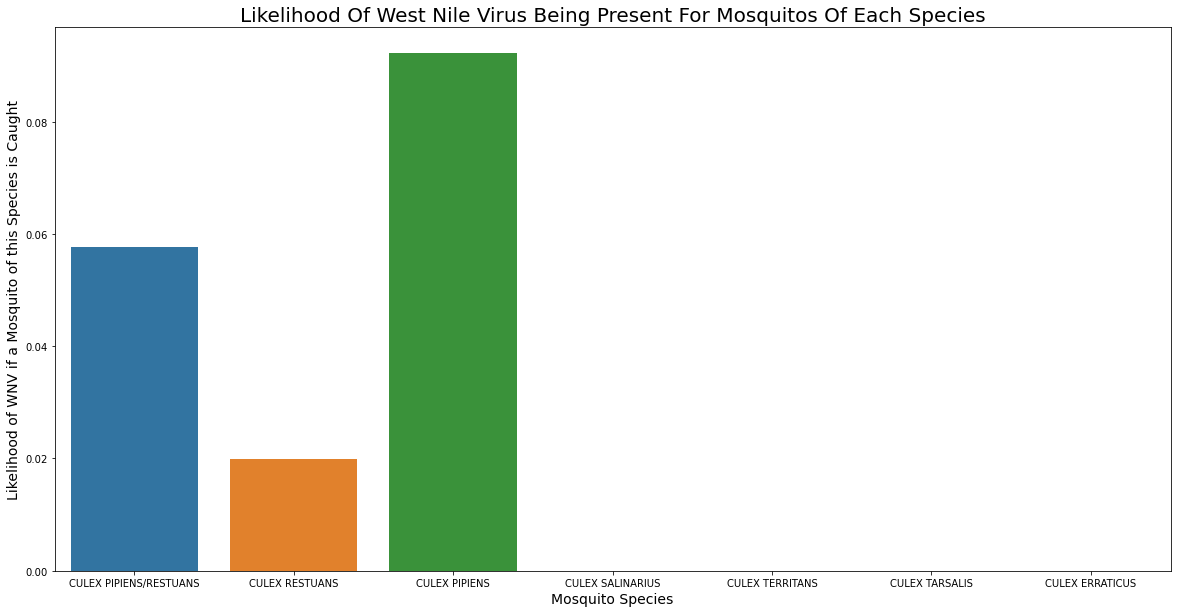

In [94]:
mos_prob = {}
mos_species = [name for name in train_comb['species'].unique()]
for mos in mos_species:
    prob = train_comb.loc[train_comb['species'] == mos, 'wnvpresent'].value_counts(normalize = True)[0]
    if prob == 1:
        mos_prob[mos] = 0
    else:
        mos_prob[mos] = (1 - prob)
        
mos_prob = pd.DataFrame(
    mos_prob.items(),
    columns = ['species', 'prob']
)

plt.figure(figsize=(20,10))
plt.title('Likelihood Of West Nile Virus Being Present For Mosquitos Of Each Species', fontsize = 20)
sns.barplot(
    data = mos_prob,
    x = 'species',
    y = 'prob'
)
plt.ylabel('Likelihood of WNV if a Mosquito of this Species is Caught', fontsize = 14)
plt.xlabel('Mosquito Species', fontsize = 14);

In [95]:
train_2011_long_wnv = train_clean.loc[((train_clean['year'] == 2011) & (train_clean['wnvpresent'] == 1)), 'longitude']
train_2011_lat_wnv = train_clean.loc[((train_clean['year'] == 2011) & (train_clean['wnvpresent'] == 1)), 'latitude']
train_2011_long = train_clean.loc[((train_clean['year'] == 2011) & (train_clean['wnvpresent'] == 0)), 'longitude']
train_2011_lat = train_clean.loc[((train_clean['year'] == 2011) & (train_clean['wnvpresent'] == 0)), 'latitude']

train_2013_long_wnv = train_clean.loc[((train_clean['year'] == 2013) & (train_clean['wnvpresent'] == 1)), 'longitude']
train_2013_lat_wnv = train_clean.loc[((train_clean['year'] == 2013) & (train_clean['wnvpresent'] == 1)), 'latitude']
train_2013_long = train_clean.loc[((train_clean['year'] == 2013) & (train_clean['wnvpresent'] == 0)), 'longitude']
train_2013_lat = train_clean.loc[((train_clean['year'] == 2013) & (train_clean['wnvpresent'] == 0)), 'latitude']

spray_2011_long = spray_clean.loc[spray_clean['year'] == 2011, 'longitude']
spray_2011_lat = spray_clean.loc[spray_clean['year'] == 2011, 'latitude']

spray_2013_long = spray_clean.loc[spray_clean['year'] == 2013, 'longitude']
spray_2013_lat = spray_clean.loc[spray_clean['year'] == 2013, 'latitude']

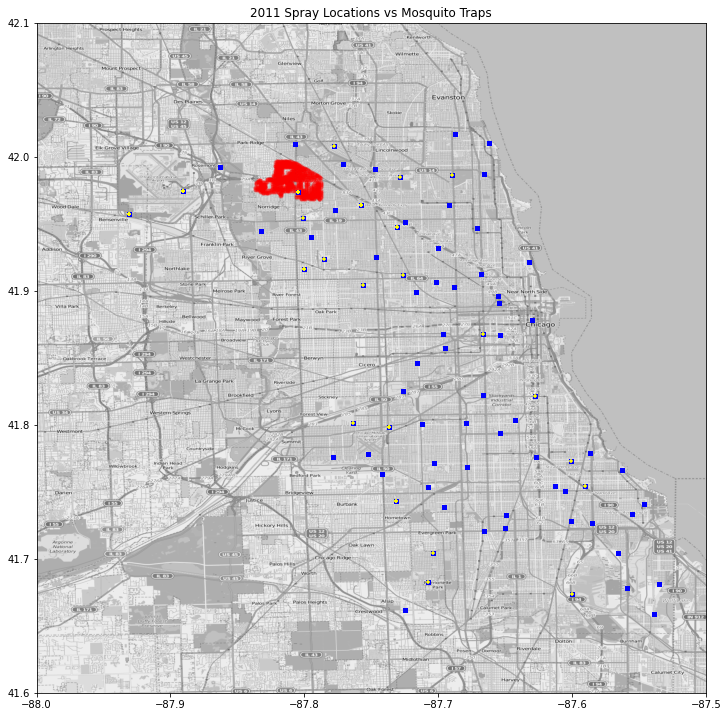

In [96]:
plt.figure(figsize=(12,16))
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")

intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth

plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.title('2011 Spray Locations vs Mosquito Traps')
plt.scatter(x=spray_2011_long, y=spray_2011_lat, c='r', s=10, alpha = 0.2)
plt.scatter(x=train_2011_long, y=train_2011_lat, c='b', s=15, marker='s')
plt.scatter(x=train_2011_long_wnv, y=train_2011_lat_wnv, c='yellow', s=15, marker='+');

# plt.savefig('map.png')

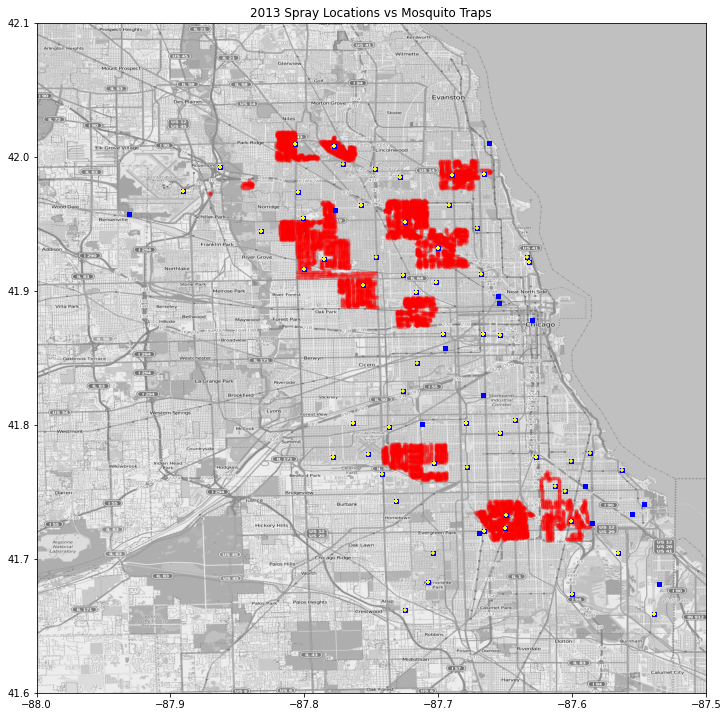

In [97]:
plt.figure(figsize=(12,16))
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")

intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth

plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.title('2013 Spray Locations vs Mosquito Traps')
plt.scatter(x=spray_2013_long, y=spray_2013_lat, c='r', s=10, alpha = 0.2)
plt.scatter(x=train_2013_long, y=train_2013_lat, c='b', s=15, marker='s')
plt.scatter(x=train_2013_long_wnv, y=train_2013_lat_wnv, c='yellow', s=15, marker='+');

## Feature Engineering

# Modelling

# Conclusion